In [13]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
import numpy as np
import dill
import scipy.io
%matplotlib inline

In [2]:
# Set up global matplotlib params. 
matplotlib.rc('font',family='serif')
matplotlib.rc('text', usetex=True)
# matplotlib.rc('font',family='serif', serif=['Times'])

# Two Player Zero Sum

In [3]:
# Load the ILQG data.
fp = open('../python/logs/two_player_zero_sum/goal_75_100_init_pi_2_5_v_5.pkl', 'rb')
ilqg_data_top = dill.load(fp)
fp.close()

fp = open('../python/logs/two_player_zero_sum/goal_75_100_init_pi_10_v_10.pkl', 'rb')
ilqg_data_bottom = dill.load(fp)
fp.close()

# Load the HJI data. 
# TODO: Correct these to be the right files.
hji_data_top = scipy.io.loadmat('../python/logs/unicycle_4d_reach_avoid_example_wMax_1_aMax_2_dMax_0.2_cost_u_10_cost_d_10_ang_1.2566_log_data.mat')
hji_data_bottom = scipy.io.loadmat('../python/logs/unicycle_4d_reach_avoid_example_wMax_1_aMax_2_dMax_0.2_cost_u_10_cost_d_10_ang_0.31416_log_data.mat')

In [4]:
# Environment parameters.
goal = (75.0, 100.0)
obstacle_centers = [(100.0, 35.0), (65.0, 65.0), (25.0, 80.0)]
obstacle_radii = [10.0, 10.0, 10.0]
x_lims = (0, 150)
y_lims = (0, 125)
T = 0.1

In [5]:
def plot_obstacles(ax):
    for center, radius in zip(obstacle_centers, obstacle_radii):
        circle = plt.Circle((center[0], center[1]), radius, color='grey', fill=True, alpha=0.75)
        ax.add_artist(circle)
        # ax.text(center[0] - 1.25, center[1] - 1.25, "obs", fontsize=8)
        
def plot_goal(ax):
    ax.scatter(goal[0], goal[1], s=75, c='g', marker='*')

In [6]:
def plot_vel_traj(ax, traj, downsample, vel_lims=None):    
    xs = np.array([x[0, 0] for k, x in enumerate(traj) if k % downsample == 0])
    ys = np.array([x[1, 0] for k, x in enumerate(traj) if k % downsample == 0])
    
    # Use the velocity along the trajectory to color it.
    vel = np.array([x[3, 0] for k, x in enumerate(traj) if k % downsample == 0])
    
    points = np.array([xs, ys]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)    
    
    min_vel = vel_lims[0] if vel_lims is not None else vel.min()
    max_vel = vel_lims[1] if vel_lims is not None else vel.max()
    
    print("min_vel = {}, max_vel = {}".format(min_vel, max_vel))
    
    norm = plt.Normalize(min_vel, max_vel)
    lc = LineCollection(segments, cmap='viridis', norm=norm)

    # Set the velocity to be used for color mapping.
    lc.set_array(vel)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    
    return line

In [15]:
def plot_iteration(ax, iteration, data, downsample=1):
    ax.set_title('Iteration ' + str(iteration), fontsize=18)
    
    ilqg_data = data['ilqg']
    hji_data = data['hji']
    
    # Plot the obstacles.
    plot_obstacles(ax)
    
    # Plot the goal.
    plot_goal(ax)
    
    ################################################################################
    # Plot the ILQG trajectory.
    ilqg_traj = ilqg_data['xs'][iteration]
    
    ilqg_xs = [x[0, 0] for k, x in enumerate(ilqg_traj) if k % downsample == 0]
    ilqg_ys = [x[1, 0] for k, x in enumerate(ilqg_traj) if k % downsample == 0]
    
    ilqg_line = None
    ilqg_line = plot_vel_traj(ax, ilqg_traj, downsample, vel_lims=(0, 30))
#     ax.plot(xs, ys, '.-b', label="ILQ game", alpha=1., markersize=2)
    ################################################################################
    
    ################################################################################
    # Plot the HJI trajectory.
    hji_traj = hji_data['traj']
    hji_line = ax.plot(hji_traj[0, :], hji_traj[1, :], label='HJI', linestyle='dashed', c='b')
#     ax.plot(xs, ys, '.-b', label="ILQ game", alpha=1., markersize=2)
    ################################################################################

    ax.set_xlim(x_lims)
    ax.set_ylim(y_lims)
    ax.set_xlabel('$x(t)$', fontsize=16)
    ax.set_ylabel('$y(t)$', fontsize=16)
    
    # Remove the x and y ticks.
    plt.sca(ax)
    plt.xticks([])
    plt.yticks([])
    
    return ilqg_line, hji_line

## Top figure

min_vel = 0, max_vel = 30
min_vel = 0, max_vel = 30
min_vel = 0, max_vel = 30
min_vel = 0, max_vel = 30


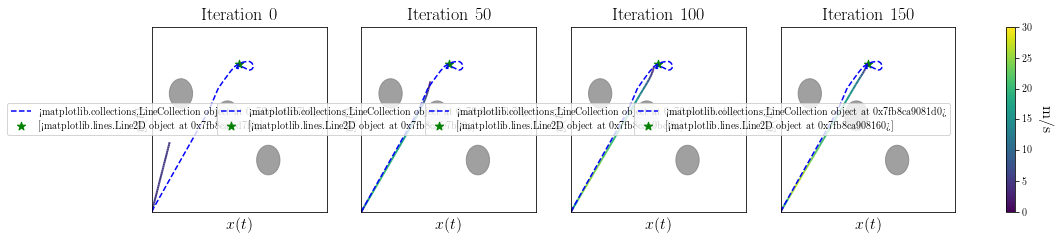

In [12]:
iterations = [0, 50, 100, 150]
fig, axes = plt.subplots(1, len(iterations))

data = {'ilqg': ilqg_data_top, 'hji': hji_data_top}

ilqg_line = None
hji_line = None
for i, axi in zip(iterations, axes):
    ilqg_line, hji_line = plot_iteration(axi, i, data, downsample=3)
        
if ilqg_line is not None:
    bar = fig.colorbar(ilqg_line, ax=axes.ravel().tolist())
    bar.ax.set_ylabel('m/s', rotation=270, labelpad=24, fontsize=16)

fig.set_figwidth(4 * len(iterations) + 2)
fig.set_figheight(3.4)
plt.savefig('plots/two_player_zero_sum_top.pdf', bbox_inches='tight')

## Bottom figure

min_vel = 0, max_vel = 30
min_vel = 0, max_vel = 30
min_vel = 0, max_vel = 30
min_vel = 0, max_vel = 30


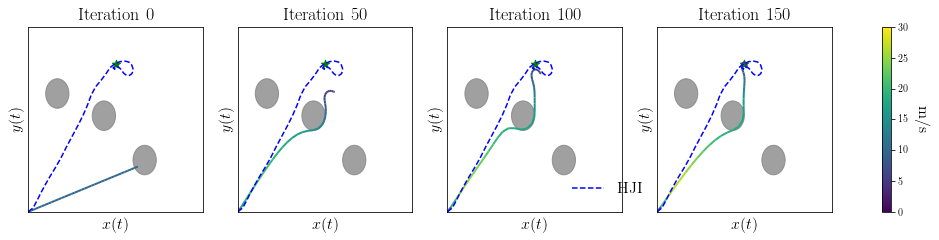

In [22]:
fig, axes = plt.subplots(1, len(iterations))

data = {'ilqg': ilqg_data_bottom, 'hji': hji_data_bottom}

ilqg_line = None
hji_line = None
for i, axi in zip(iterations, axes):
    ilqg_line, hji_line = plot_iteration(axi, i, data, downsample=3)
        
if ilqg_line is not None:
    bar = fig.colorbar(ilqg_line, ax=axes.ravel().tolist())
    bar.ax.set_ylabel('m/s', rotation=270, labelpad=24, fontsize=16)
    
plt.legend((Line2D([0], [0], color='b', linestyle='--'),), 
           ('HJI',),
          loc='lower right',
          fontsize=16,
          framealpha=0,
          bbox_to_anchor=(0, 0))

fig.set_figwidth(4 * len(iterations) + 2)
fig.set_figheight(3.4)
plt.savefig('plots/two_player_zero_sum_bottom.pdf', bbox_inches='tight')

In [10]:
# fig, axes = plt.subplots(3, len(iterations))

# downsample = 1

# for ii in range(len(iterations)):
#     ilqg_us = ilqg_data['us'][iterations[ii]][0]
    
#     # TODO: Add plots from the HJI 
    
#     ilqg_omeg = [u[0, 0] for k, u in enumerate(ilqg_us) if k % downsample == 0]
#     ilqg_accs = [u[1, 0] for k, u in enumerate(ilqg_us) if k % downsample == 0]
#     ts = [T * k for k in range(len(ilqg_us)) if k % downsample == 0]
    
#     # Plot ILQG/HJI acceleration control input.
#     axes[0, ii].plot(ts, ilqg_accs)
#     axes[0, ii].set_xlabel('$t$ (s)', fontsize=16)
#     axes[0, ii].set_ylabel('$a(t)$ (m/s/s)', fontsize=16)
    
#     # Plot the ILQG/HJI angular velocity control input.
#     axes[1, ii].plot(ts, ilqg_omeg)
#     axes[1, ii].set_xlabel('$t$ (s)', fontsize=16)
#     axes[1, ii].set_ylabel('$\omega(t)$ (rad/s)', fontsize=16)
    
#     ilqg_ds = ilqg_data['us'][iterations[ii]][1]
    
#     ilqg_dvxs = [u[0, 0] for k, u in enumerate(ilqg_ds) if k % downsample == 0]
#     ilqg_dvys = [u[1, 0] for k, u in enumerate(ilqg_ds) if k % downsample == 0]
    
#     # Plot the ILQG/HJI disturbance inputs. 
#     axes[2, ii].plot(ts, ilqg_dvxs)
#     axes[2, ii].plot(ts, ilqg_dvys)
#     axes[2, ii].set_xlabel('$t$ (s)', fontsize=16)
#     axes[2, ii].set_ylabel('$\d_1(t), d_t')
    
# fig.set_figwidth(4 * len(iterations) + 2)
# fig.set_figheight(12)
# plt.savefig('plots/two_player_zero_sum_ctrl_dstb.pdf', bbox_inches='tight')